Quick readout of data into one histogram. Very trivial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '/home/eric/sim/WWLegend/Output/NeutronTagger/Energies/Energies_all.csv'
df = pd.read_csv(file_path, sep=',', header=5)
# Initialize empty NumPy arrays for each column
column_arrays = [np.empty(df.shape[0], dtype=object) for _ in range(8)]

# Its doing fine just ignorring the first row for some reason

# Iterate over each column and fill the NumPy arrays
for i, column in enumerate(df.columns):
    # Split each entry using ';' and convert to NumPy arrays
    column_arrays[i] = df[column].apply(lambda x: np.array(str(x).split(';'))).values
Energies = column_arrays[0]

flattened_array = []
for subarray in Energies:
    subarray = subarray.astype(float)
    for number in subarray:
        flattened_array.append(number)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


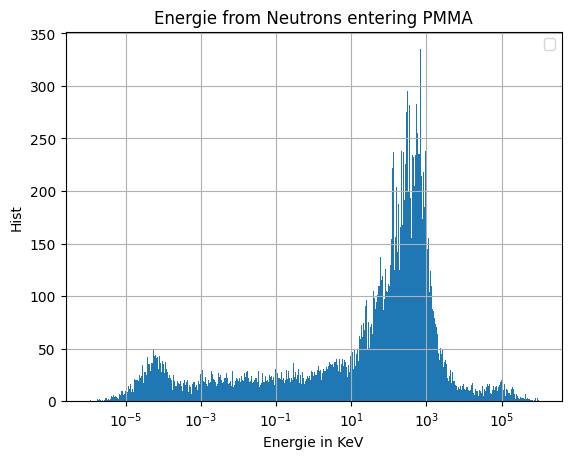

In [2]:
fig, ax = plt.subplots()

n_bins = 1000
rangeBins = (0, 100000)

ax.hist(flattened_array, bins=np.logspace(np.log10(1e-6),np.log10(1e6),n_bins))


ax.set_xlabel('Energie in KeV')
ax.set_ylabel('Hist')
ax.set_title('Energie from Neutrons entering PMMA')
ax.legend(loc= "upper right")
ax.set_xscale("log")
#ax.set_yscale("log")
ax.grid()

#plt.savefig("/home/eric/sim/WWLegend/Plots/Energies.png")
plt.show()

Save data in prefered format

In [3]:
# Header for the CSV file
header = ["Energies of Neutron entering PMMA for Ge77 Production in KeV"]

# Name of the CSV file
csv_file_name = '/home/eric/sim/WWLegend/Output/Energies_Formated.csv'


# Save the NumPy array to a CSV file
np.savetxt(csv_file_name, flattened_array, header='\t'.join(header), comments='', delimiter=',')